## Problems from Hughes and Hase

In [1]:
import scipy as sp
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Problem 2.2

Twelve data points given:

In [2]:
data = sp.array([5.33,4.95,4.93,5.08,4.95,4.96,5.02,4.99,5.24,5.25,5.23,5.01])

#### a) Calculating the mean: $\quad\mu = \frac{1}{N}\sum_i x_i$

In [3]:
print("mean =",sum(data)/len(data))

mean = 5.07833333333


or

In [4]:
print("mean =",sp.mean(data))

mean = 5.07833333333


#### b) standard deviation: $\quad\sigma = \sqrt{\frac{1}{N-1} \sum_i (x_i - \mu)^2}$

In [5]:
print("standard deviation =",sp.sqrt(sum((data-sp.mean(data))**2)/(len(data)-1)))

standard deviation = 0.143579774046


or

In [6]:
print("standard deviation =",sp.std(data))

standard deviation = 0.137467167797


These results do not agree!!  

By default the scipy std method calculates $\sigma_N$, which is similar to the
$\sigma_{N-1}$ given in Eq.(2.3) of H&H, except the denominator is $N$ instead of $N-1$.  The difference doesn't usually matter, and we won't go into this in any depth now. But if we set the 'ddof=1' option scipy will calculate $\sigma_{N-1}$.

Remember: you can see all the details of sp.std by typing sp.std?.

In [7]:
print("standard deviation =",sp.std(data,ddof=1))

standard deviation = 0.143579774046


#### c) Standard error, or standard deviation of the  mean

Use Eq.(2.7): $\quad\alpha = \frac{\sigma_{N-1}}{\sqrt{N}}$.

In [8]:
print("standard error =",sp.std(data,ddof=1)/sp.sqrt(len(data)))

standard error = 0.0414479105979


#### d) Formatted result

$\mbox{sensitivity} = 5.071 \pm 0.041 $

Sample $n$  random numbers from the normal distribution with mean $\mu$, standard deviation $\sigma$, and 
pdf
\begin{equation}
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-(x-\mu)^2/\sigma^2\right)
\end{equation}

### Problem 2.3

The standard error, or standard deviation of the  mean, is given by Eq.(2.7):

$$ \alpha = \frac{\sigma_{N-1}}{\sqrt{N}}. $$

To decrease $\alpha$ by a factor of 10, the denominator must be increased by the 
same factor, which means that  $N$ must increase by a factor of 100.  Translating to the described experiment, this means that data should be collected for 100 minutes (assuming that everything in the experiment is stable for that length of time).


 ### Problem 2.6

(i) If the mean is $\bar{\delta} = 3.27346$, and the standard error (standard deviation of the mean) is $\alpha = 0.01913$, I would report $\delta = 3.27 \pm 0.02$ (although some might report this as $\delta = 3.273 \pm 0.019).

### Problem 3.2

In [9]:
import sympy as sym # import sympy for symbolic integration
sym.init_printing() # for LaTeX formatted output

a, x, mu  = sym.symbols('a x mu') # must declare symbolic variables in sympy
                                  # I will use mu for x-bar

Define the probability distribution function.<br>
(The conditional will be incorporated in the limits of integration.)

In [10]:
p = 1/a

a) A probability distribution is normalized if the integral over all space is one, i.e., $\int_{-\infty}^\infty P_U(x;\bar{x},a) \, dx = \int_{\mu-a/2}^{\mu+a/2}P_U(x;\bar{x},a) \, dx = 1$.

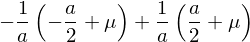

In [11]:
sym.integrate(p,(x,mu-a/2,mu+a/2))

In [12]:
sym.simplify(_)   # The underscore "_" is like the Mathematica %
                  # it refers to the previous output. 

b) The mean is just the first moment of the distribution given by Eq.(3.4):

$$ \bar{x} = \int_{-\infty}^\infty P(x) x\, dx     $$

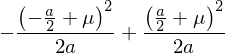

In [13]:
sym.integrate(p*x,(x,mu-a/2,mu+a/2))

In [14]:
sym.simplify(_)

c) The square of the standard deviation, or variance,  is given by Eq.(3.5):

$$ \sigma^2 = \int_{-\infty}^\infty P(x)(x-\bar{x})^2\, dx $$

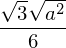

In [15]:
sym.sqrt(sym.integrate(p*(x-0)**2,(x,-a/2,a/2)))

### Problem 3.5

Normally distributed pasta bags with a mean weight of 502 g, and an s.d. of 14 g.

In [16]:
mean = 502.
sigma = 14.

What is the probability that a bag contains less than 500 g?<br>
This information is given directly by the cumulative distribution function (c.d.f.)

In [17]:
sp.stats.norm.cdf(500,mean,sigma)


In a sample of 1000 bags, how many are expected to contain at least 530 g?<br>
This information is given indirectly by the c.d.f.  The probability of one bag containing 
more than 530 is (1 - c.d.f), and we must multiply by the number of bags.

In [18]:
1000*(1-sp.stats.norm.cdf(530,mean,sigma))

### Problem 3.7

Radioactive decays recorded during 58 successive one-second experiments.

In [19]:
data = sp.array([[1,1],[2,0],[3,2],[4,3],[5,6],[6,9],[7,11],[8,8],[9,8],\
                 [10,6],[11,2],[12,1],[13,1]])


<IPython.core.display.Javascript object>


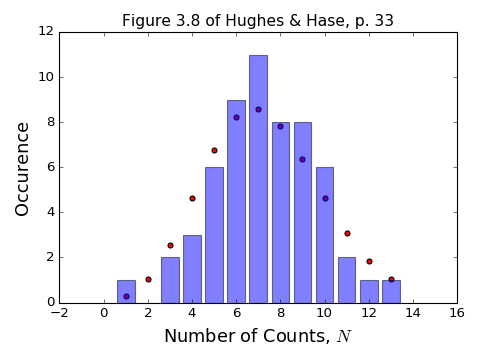

In [20]:
plt.figure(1)
n = data.T[0]   # get values for horizontal axis (use transform of data array)
height = data.T[1]
plt.title("Figure 3.8 of Hughes & Hase, p. 33",fontsize=14)
plt.xlabel("Number of Counts, $N$")
plt.ylabel("Occurence")
plt.bar(n,height,align='center',alpha=0.5)  # alpha sets opacity so data will 
                                            # data will be visible later
plt.show()

Check that we have the correct number of trials:

In [21]:
ntrials = sum(height)
ntrials

58

That was good.  Now calculate the total number of counts recorded.  Remember that multiplication of scipy arrays is "element by element."

In [22]:
sum(n*height)

423

or equivalently

In [23]:
sp.dot(n,height)

423

The mean count rate is the total number of counts divided by the total number of trials:

In [24]:
mean = sp.dot(n,height)/ntrials
mean

The easiest way to determine the probability of 5 counts or fewer is to use the CDF:

In [25]:
prob = sp.stats.poisson.cdf(5,mean)
prob

The expected number of occurrences is the probability $\times$ the number of experiments:

In [26]:
prob*ntrials

The expected number of occurrences 20 or more is (1 - c.d.f(19)):

In [27]:
prob2 = 1 - sp.stats.poisson.cdf(19,mean)
prob2

The expected number of occurrences 20 or more is the probability $\times$ the number of experiments:

In [28]:
prob2*ntrials

CONCLUSION: We're not going to observe any runs with 20 or more counts.  If the mean is 7, that implies that $\sigma=\sqrt{7}$.  A detection of 20 counts would be $(20-7)/\sqrt{7} = 4.9$
standard deviations away from the mean.

In [29]:
y = sp.stats.poisson.pmf(n,mean)*ntrials
plt.scatter(n,y,c='r')

### Problem 3.8
Another radioactive decay problem $\implies$ another Poisson distribution problem.<br>

Use counts/min as units.  Then the mean count rate is just 270 (only 1 trial).
So  
\begin{eqnarray*}
\overline{n} &=& 270 \\
\sigma &=& \sqrt{270} \\
\alpha &=&\frac{\sigma}{\sqrt{N}} = \frac{\sqrt{270}}{\sqrt{1}} = 16.4
\end{eqnarray*}
So the error in the mean count rate is $\alpha = 16.4$.

The fractional error is:

In [30]:
sp.sqrt(270)/270

Counting for 15 minutes should yield a count rate of $15\times 270\pm \sqrt{15\times 270}$:

In [31]:
15*270,sp.sqrt(15*270)

The mean of the distribution should be 4050.  The probability of getting exactly this value is given by the pmf:

In [32]:
sp.stats.poisson.pmf(4050,4050)

### Problem 3.9

Comparing Poisson distribution with mean of 35 to a normal distribution with a mean of 35 and a standard deviation of $\sqrt{35}$.

In [33]:
mean = 35
upper = 2*mean  # limit for graphs

<IPython.core.display.Javascript object>


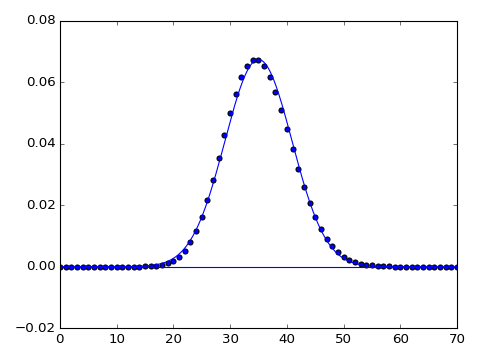

In [34]:
x1 = sp.linspace(0,upper,upper+1)
y1 = sp.stats.poisson.pmf(x1,mean)
x2 = sp.linspace(0,upper,500)
y2 = sp.stats.norm.pdf(x2,mean,sp.sqrt(mean))
plt.figure(2)
plt.xlim(0,upper)
plt.axhline(0)
plt.scatter(x1,y1)
plt.plot(x2,y2);

### Version details

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [35]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [36]:
version_information scipy, matplotlib, sympy

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
sympy 1.1
Tue Aug 01 11:08:17 2017 EDT